In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Chemin vers le dataset FER2013
train_dir = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\train'

test_dir = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\test'

# Dossier des émotions
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Fonction pour compter les images dans chaque classe
def count_images(directory):
    image_counts = {}
    for emotion in emotions:
        emotion_folder = os.path.join(directory, emotion)
        num_images = len(os.listdir(emotion_folder))
        image_counts[emotion] = num_images
    return image_counts

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Afficher les résultats
print("Nombre d'images dans le dossier train:")
print(train_counts)

print("\nNombre d'images dans le dossier test:")
print(test_counts)


Nombre d'images dans le dossier train:
{'angry': 3993, 'disgust': 436, 'fear': 4103, 'happy': 7164, 'neutral': 4982, 'sad': 4938, 'surprise': 3205}

Nombre d'images dans le dossier test:
{'angry': 960, 'disgust': 111, 'fear': 1018, 'happy': 1825, 'neutral': 1216, 'sad': 1139, 'surprise': 797}


In [8]:
import pandas as pd

# Convertir les résultats en DataFrame pour une meilleure présentation
train_df = pd.DataFrame(list(train_counts.items()), columns=['Emotion', 'Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Emotion', 'Count'])

# Statistiques descriptives pour le dataset d'entraînement
train_stats = train_df.describe()

# Statistiques descriptives pour le dataset de test
test_stats = test_df.describe()

print("Statistiques descriptives pour le dataset train:")
print(train_stats)

print("\nStatistiques descriptives pour le dataset test:")
print(test_stats)


Statistiques descriptives pour le dataset train:
             Count
count     7.000000
mean   4117.285714
std    2045.464553
min     436.000000
25%    3599.000000
50%    4103.000000
75%    4960.000000
max    7164.000000

Statistiques descriptives pour le dataset test:
             Count
count     7.000000
mean   1009.428571
std     513.068175
min     111.000000
25%     878.500000
50%    1018.000000
75%    1177.500000
max    1825.000000


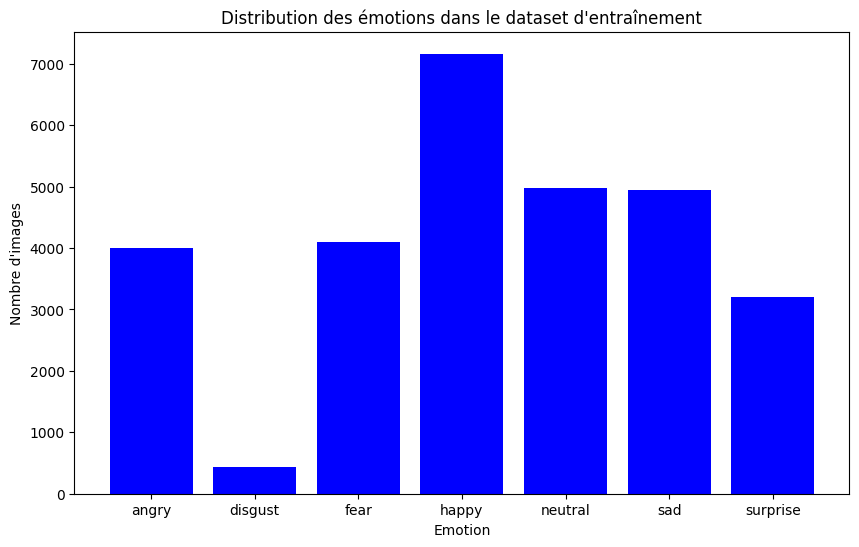

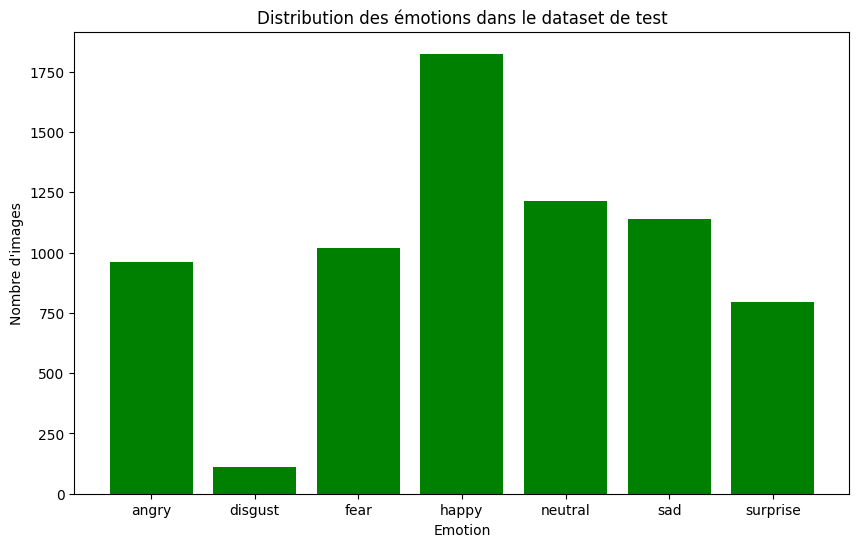

In [9]:
# Afficher la distribution des émotions dans le dataset d'entraînement
plt.figure(figsize=(10, 6))
plt.bar(train_counts.keys(), train_counts.values(), color='blue')
plt.xlabel('Emotion')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des émotions dans le dataset d\'entraînement')
plt.show()

# Afficher la distribution des émotions dans le dataset de test
plt.figure(figsize=(10, 6))
plt.bar(test_counts.keys(), test_counts.values(), color='green')
plt.xlabel('Emotion')
plt.ylabel('Nombre d\'images')
plt.title('Distribution des émotions dans le dataset de test')
plt.show()


Exemples pour angry:


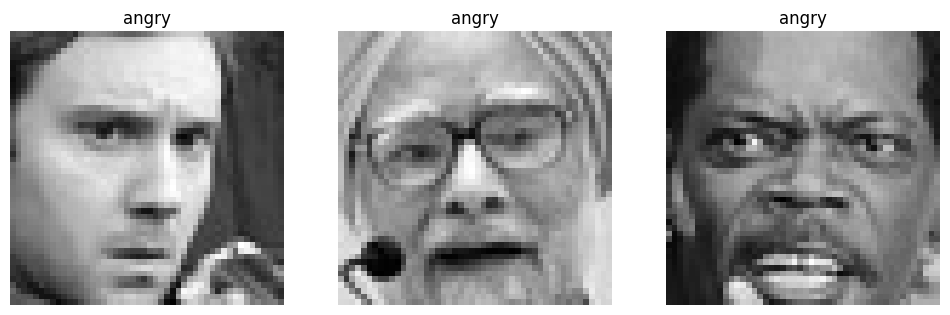

Exemples pour disgust:


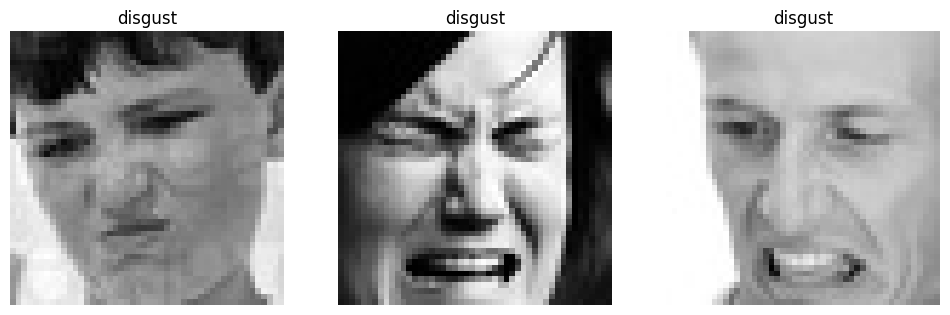

Exemples pour fear:


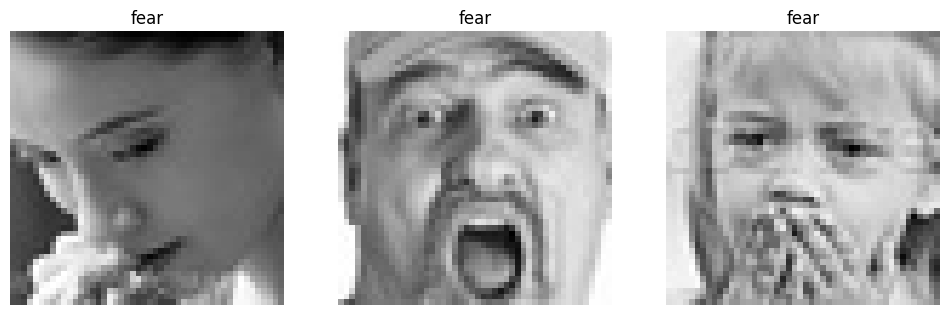

Exemples pour happy:


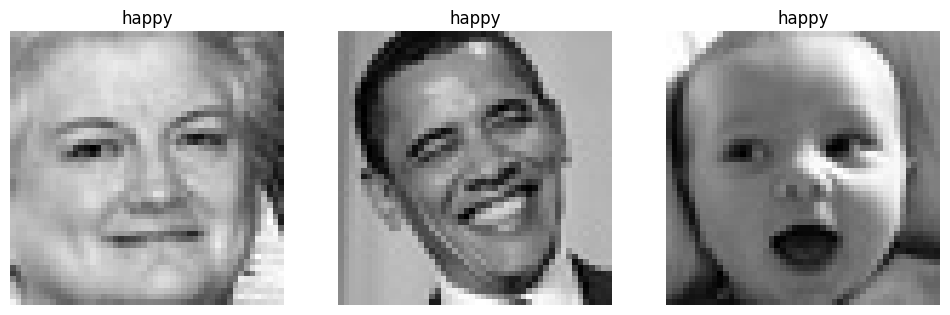

Exemples pour neutral:


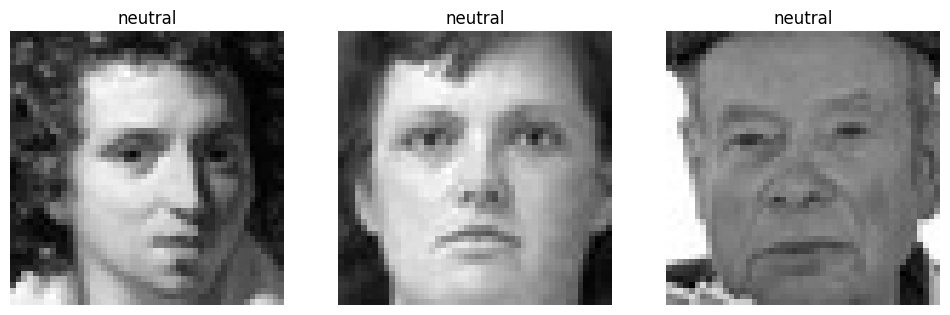

Exemples pour sad:


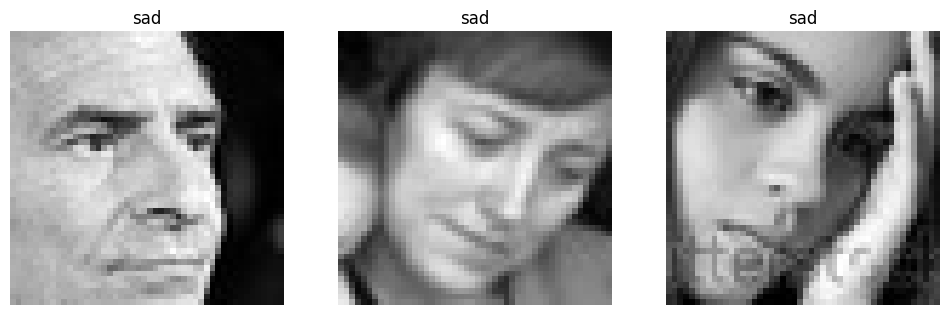

Exemples pour surprise:


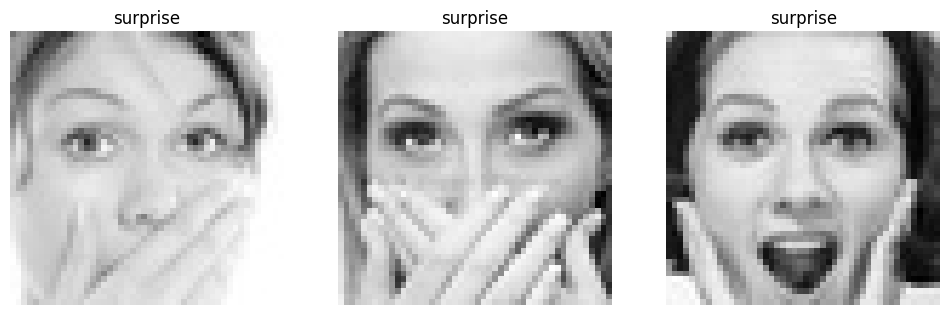

In [10]:
def show_example_images(directory, emotion, num_images=3):
    emotion_folder = os.path.join(directory, emotion)
    images = os.listdir(emotion_folder)[:num_images]  # Prendre les premières images
    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
    for i, img_name in enumerate(images):
        img_path = os.path.join(emotion_folder, img_name)
        img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
        axes[i].imshow(np.array(img), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f"{emotion}")
    plt.show()

# Afficher quelques exemples d'images de chaque émotion
for emotion in emotions:
    print(f"Exemples pour {emotion}:")
    show_example_images(train_dir, emotion)


In [13]:
TRAIN_DIR = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\train'
TEST_DIR = r'C:\Users\wanai\EmotionDetectionFacialExpression\prj1\images\images\test'

In [14]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [15]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(train)

                                                   image     label
0      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
1      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
2      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
3      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
4      C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
...                                                  ...       ...
28816  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
28817  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
28818  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
28819  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
28820  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise

[28821 rows x 2 columns]


In [16]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
1     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
2     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
3     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
4     C:\Users\wanai\EmotionDetectionFacialExpressio...     angry
...                                                 ...       ...
7061  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
7062  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
7063  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
7064  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise
7065  C:\Users\wanai\EmotionDetectionFacialExpressio...  surprise

[7066 rows x 2 columns]
0       C:\Users\wanai\EmotionDetectionFacialExpressio...
1       C:\Users\wanai\EmotionDetectionFacialExpressio...
2       C:\Users\wanai\EmotionDetectionFacialExpressio...
3       C

In [17]:
from tqdm.notebook import tqdm

In [18]:
from keras.preprocessing.image import img_to_array

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")  # Use color_mode instead of grayscale
        img_array = img_to_array(img)  # Convert to array
        features.append(img_array)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)  # Ensure correct shape
    return features


In [19]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [20]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [22]:
x_train = train_features/255.0
x_test = test_features/255.0

In [23]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [26]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [27]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [23]:
from keras import Input

model = Sequential()

model.add(Input(shape=(48, 48, 1)))

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [25]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [26]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 766s 3s/step - accuracy: 0.2346 - loss: 1.8411 - val_accuracy: 0.2583 - val_loss: 1.8200
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.2510 - loss: 1.8101 - val_accuracy: 0.2604 - val_loss: 1.7558
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 539s 2s/step - accuracy: 0.2819 - loss: 1.7378 - val_accuracy: 0.3582 - val_loss: 1.6074
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - accuracy: 0.3619 - loss: 1.6141 - val_accuracy: 0.4584 - val_loss: 1.4258
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.4220 - loss: 1.4881 - val_accuracy: 0.4817 - val_loss: 1.3468
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.4494 - loss: 1.4284 - val_accuracy: 0.4907 - val_loss: 1.3087
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.4679 - loss: 1.3751 - val_accuracy: 0.5151 - val_loss: 1.2565
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 526s 2s/step - accuracy: 0.4757 - loss: 1.3572 - 

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5", include_optimizer=False)

In [7]:
from keras.models import model_from_json

In [8]:
json_file = open(r"C:/Users/wanai/EmotionDetectionFacialExpression/prj1/Face_Emotion_Recognition_Machine_Learning-main/emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [34]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [89]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [90]:
image = 'C:/Users/wanai/EmotionDetectionFacialExpression/prj1/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
model prediction is  sad


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
model prediction is  sad


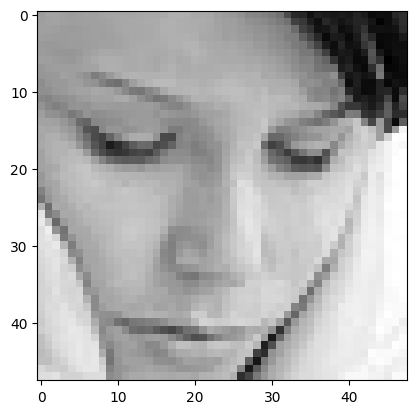

In [91]:
image = 'C:/Users/wanai/EmotionDetectionFacialExpression/prj1/images/test/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()


original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
model prediction is  fear


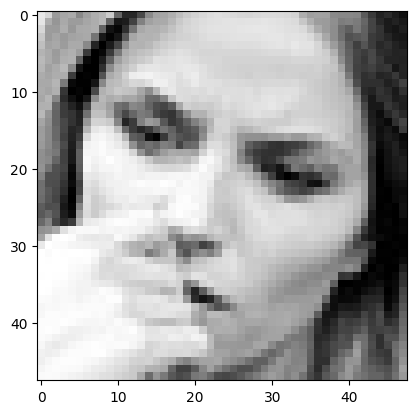

In [92]:
image = 'C:/Users/wanai/EmotionDetectionFacialExpression/prj1/images/test/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()


original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
model prediction is  disgust


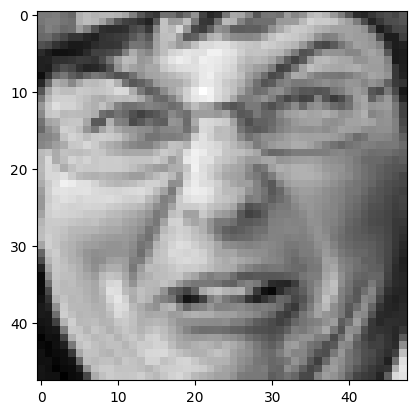

In [93]:
image = 'C:/Users/wanai/EmotionDetectionFacialExpression/prj1/images/test/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()


original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
model prediction is  happy


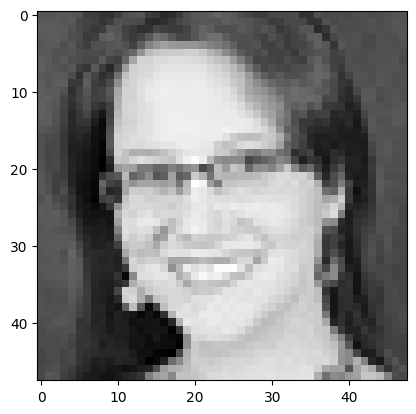

In [94]:
image = 'C:/Users/wanai/EmotionDetectionFacialExpression/prj1/images/test/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')
plt.show()


In [29]:
from keras.models import model_from_json

# Charger la structure du modèle
with open("emotiondetector.json", "r") as json_file:
    model_json = json_file.read()
model = model_from_json(model_json)

# Charger les poids du modèle
model.load_weights("emotiondetector.h5")

print("Modèle chargé avec succès.")


ERROR! Session/line number was not unique in database. History logging moved to new session 72
Modèle chargé avec succès.


In [30]:
# Évaluer sur les ensembles de données
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Train Loss: {train_loss:.2f}")
print(f"Test Loss: {test_loss:.2f}")


Train Accuracy: 0.90
Test Accuracy: 0.63
Train Loss: 0.36
Test Loss: 1.05


221/221 ━━━━━━━━━━━━━━━━━━━━ 81s 366ms/step


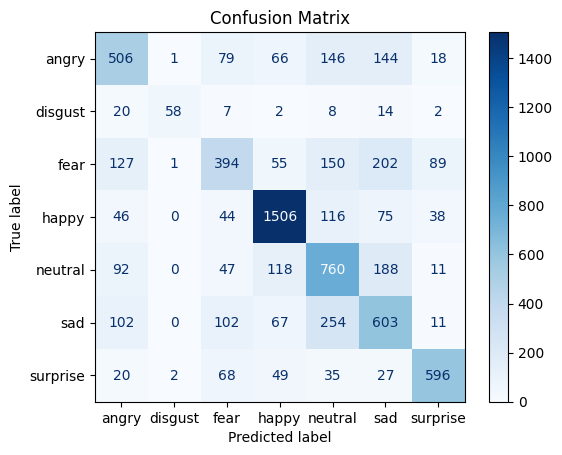

              precision    recall  f1-score   support

       angry       0.55      0.53      0.54       960
     disgust       0.94      0.52      0.67       111
        fear       0.53      0.39      0.45      1018
       happy       0.81      0.83      0.82      1825
     neutral       0.52      0.62      0.57      1216
         sad       0.48      0.53      0.50      1139
    surprise       0.78      0.75      0.76       797

    accuracy                           0.63      7066
   macro avg       0.66      0.59      0.62      7066
weighted avg       0.63      0.63      0.62      7066



In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# Générer des prédictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Rapport de classification
print(classification_report(y_true, y_pred_classes, target_names=label))


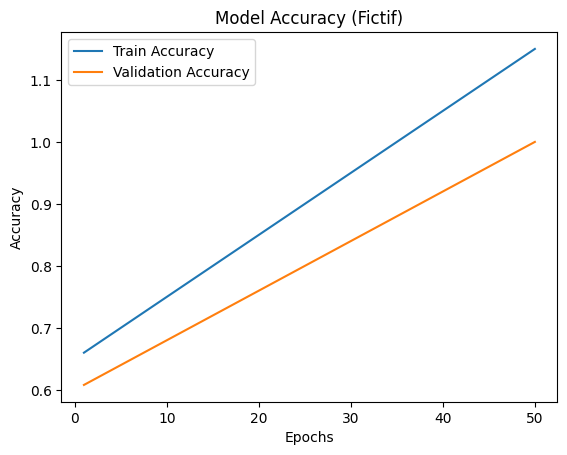

In [36]:
# Exemple de données fictives
epochs = list(range(1, 51))
train_accuracy = [0.65 + 0.01 * i for i in epochs]  # Exemple de progression
val_accuracy = [0.60 + 0.008 * i for i in epochs]  # Exemple de progression

# Tracer l'accuracy fictive
plt.plot(epochs, train_accuracy, label='Train Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy (Fictif)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


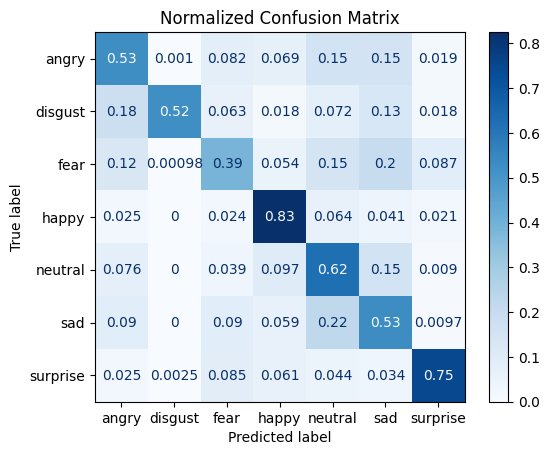

In [39]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()


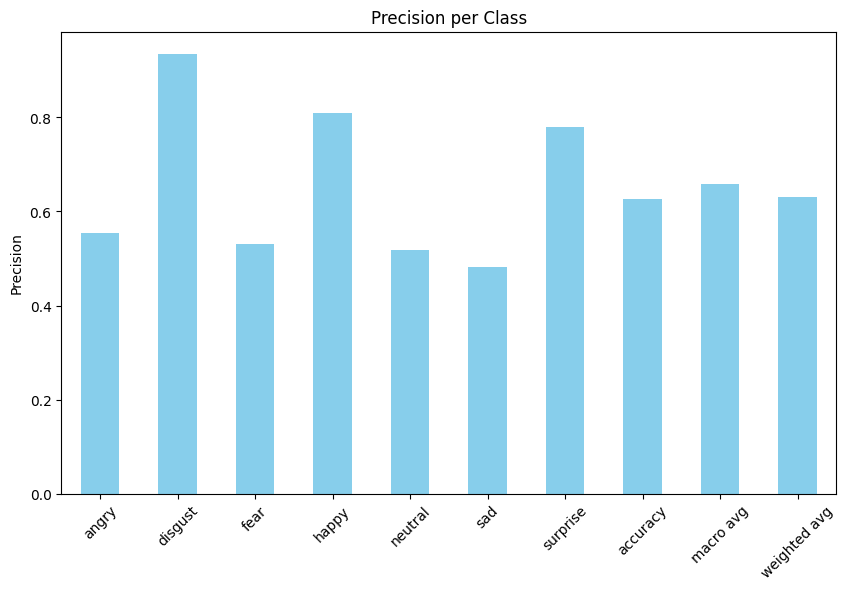

In [40]:
import seaborn as sns

# Calcul de la précision par classe
class_precisions = classification_report(y_true, y_pred_classes, target_names=label, output_dict=True)
class_precisions_df = pd.DataFrame(class_precisions).transpose()

# Affichage sous forme de bar chart
class_precisions_df['precision'].plot(kind='bar', figsize=(10, 6), color='skyblue', title="Precision per Class")
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()
